In [1]:
#Load the Dataset
from tensorflow.keras.datasets import imdb
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)
print('Dataset loaded successfully!')

Dataset loaded successfully!


In [2]:
#Explore the dataset
print('The length of the training dataset is:',len(XT))
print('The length of the test dataset is:',len(Xt))
print('The first review in the training dataset is:',XT[0])
print('The length of the first review in the training dataset is:',len(XT[0]))

#Convert numeric review to text review
word_idx = imdb.get_word_index()
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print('The first review in the training dataset is:',actual_review)
print(len(actual_review.split()))


The length of the training dataset is: 25000
The length of the test dataset is: 25000
The first review in the training dataset is: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 

In [3]:
#Padding the dataset
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)
print('The shape of the training dataset is:',X_train.shape)
print('The shape of the test dataset is:',X_test.shape)
print(X_train[0])

The shape of the training dataset is: (25000, 500)
The shape of the test dataset is: (25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

In [4]:
#Create the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 643137 (2.45 MB)
Trainable params: 643137 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [5]:
#Compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
print('Model compiled successfully!')


Model compiled successfully!


In [6]:
#Callback to save the best model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint('best_model.h5',monitor='val_loss',verbose=0,save_best_only=True,save_weights_only=False)
earlystop = EarlyStopping(monitor='val_loss',patience=1)

print('Callbacks created successfully!')

Callbacks created successfully!


In [7]:
#train the model
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 11s 64ms/step - loss: 0.5448 - accuracy: 0.7159 - val_loss: 0.6655 - val_accuracy: 0.6960
Epoch 2/10
  3/157 [..............................] - ETA: 9s - loss: 0.5145 - accuracy: 0.7578

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 10s 63ms/step - loss: 0.3351 - accuracy: 0.8636 - val_loss: 0.3878 - val_accuracy: 0.8210
Epoch 3/10
157/157 [==============================] - 10s 64ms/step - loss: 0.2503 - accuracy: 0.9025 - val_loss: 0.3410 - val_accuracy: 0.8538
Epoch 4/10
157/157 [==============================] - 10s 64ms/step - loss: 0.1992 - accuracy: 0.9284 - val_loss: 0.3944 - val_accuracy: 0.8530


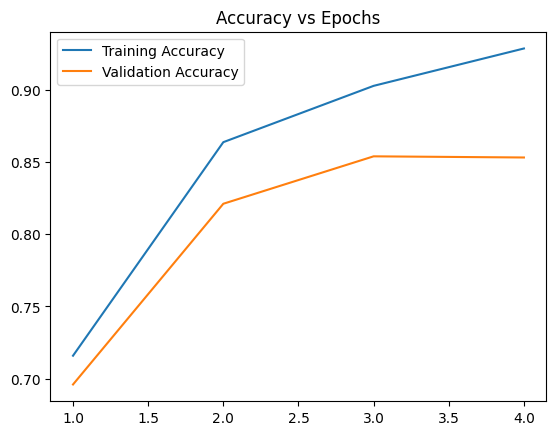

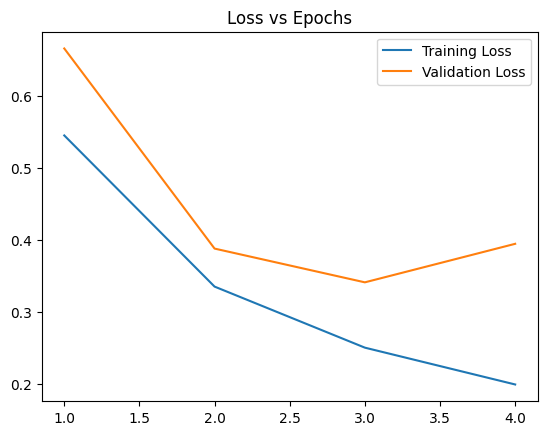

In [10]:
#Visualize model metrics
import matplotlib.pyplot as plt
#We will plot two line graphs: one for accuracy and the other for loss
# 1. Validation accuracy vs Training accuracy
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
epochs = range(1,len(loss)+1)

plt.title('Accuracy vs Epochs')
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()
plt.show()

# 2. Validation loss vs Training loss
plt.title('Loss vs Epochs')
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [11]:
# Test model
model.evaluate(X_test,Yt)
print('Model evaluated successfully!')

782/782 [==============================] - 6s 8ms/step - loss: 0.4263 - accuracy: 0.8420
Model evaluated successfully!
